In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

def sample_bimodal_gaussian_split(
    mu1: float, sigma1: float,
    mu2: float, sigma2: float,
    size: int = 1,
    weight: float = 0.5
) -> np.ndarray:
    """
    Generate random samples from a bimodal Gaussian (mixture of two Gaussians).

    Args:
        mu1 (float): Mean of the first Gaussian.
        sigma1 (float): Std dev of the first Gaussian.
        mu2 (float): Mean of the second Gaussian.
        sigma2 (float): Std dev of the second Gaussian.
        weight (float): Probability of sampling from the first Gaussian (0 to 1).
        size (int): Number of samples to generate.

    Returns:
        np.ndarray: Array of random samples from the bimodal distribution.
    """
    choices = np.random.rand(size) < weight
    samples_lo = np.empty(np.sum(choices))
    samples_hi = np.empty(np.sum(~choices))

    samples_lo = np.random.normal(mu1, sigma1, np.sum(choices))
    samples_hi = np.random.normal(mu2, sigma2, np.sum(~choices))

    samples_lo[samples_lo < 0] = 0
    samples_hi[samples_hi < 0] = 0

    return samples_lo, samples_hi 

def sample_bimodal_gaussian(
    mu1: float, sigma1: float,
    mu2: float, sigma2: float,
    size: int = 1,
    weight: float = 0.5
) -> np.ndarray:
    """
    Generate random samples from a bimodal Gaussian (mixture of two Gaussians).

    Args:
        mu1 (float): Mean of the first Gaussian.
        sigma1 (float): Std dev of the first Gaussian.
        mu2 (float): Mean of the second Gaussian.
        sigma2 (float): Std dev of the second Gaussian.
        weight (float): Probability of sampling from the first Gaussian (0 to 1).
        size (int): Number of samples to generate.

    Returns:
        np.ndarray: Array of random samples from the bimodal distribution.
    """
    choices = np.random.rand(size) < weight
    samples = np.empty(size)
    samples[choices] = np.random.normal(mu1, sigma1, np.sum(choices))
    samples[~choices] = np.random.normal(mu2, sigma2, np.sum(~choices))
    samples[samples < 0] = 0
    return samples 

def sample_bimodal_gaussian2D(
    mu1: np.array, sigma1: np.array,
    mu2: np.array, sigma2: np.array,
    size: int = 1,
    weight: float = 0.5
) -> np.ndarray:
    """
    Generate random samples from a bimodal Gaussian (mixture of two Gaussians).

    Args:
        mu1 (float): Mean of the first Gaussian.
        sigma1 (float): Std dev of the first Gaussian.
        mu2 (float): Mean of the second Gaussian.
        sigma2 (float): Std dev of the second Gaussian.
        weight (float): Probability of sampling from the first Gaussian (0 to 1).
        size (int): Number of samples to generate.

    Returns:
        np.ndarray: Array of random samples from the bimodal distribution.
    """
    choices = np.random.rand(size) < weight
    samples0 = np.empty(size)
    samples0[choices] = np.random.normal(mu1[0], sigma1[0], np.sum(choices))
    samples0[~choices] = np.random.normal(mu2[0], sigma2[0], np.sum(~choices))
    samples0[samples0 < 0] = 0

    samples1 = np.empty(size)
    samples1[choices] = np.random.normal(mu1[1], sigma1[1], np.sum(choices))
    samples1[~choices] = np.random.normal(mu2[1], sigma2[1], np.sum(~choices))
    samples1[samples1 < 0] = 0
    return samples0, samples1

def correlated_2d_normal(mean, cov, size=10000):
    """
    Generate and plot a correlated 2D normal distribution.

    Args:
        mean (list): Means for each dimension [mean_x, mean_y].
        cov (list of lists): Covariance matrix [[var_x, cov_xy], [cov_yx, var_y]].
        num_samples (int): Number of samples to generate.
        bins (int): Number of bins for the 2D histogram.
        cmap (str): Colormap for the heatmap.

    Returns:
        t1_samples (np.ndarray): Samples for the first variable.
        t2_samples (np.ndarray): Samples for the second variable.
    """
    samples = np.random.multivariate_normal(mean, cov, size)
    t1_samples = samples[:, 0]
    t2_samples = samples[:, 1]

    return t1_samples, t2_samples

def double_correlated_2d_normal(mean1, cov1, mean2, cov2, size=1, weight=0.5):
    """
    Generate and plot two correlated 2D normal distributions.

    Args:
        mean1, mean2: Means for each distribution [mean_x, mean_y].
        cov1, cov2: Covariance matrices for each distribution.
        num_samples: Number of samples for each distribution.
        bins: Number of bins for the 2D histogram.
        cmap: Colormap for the heatmap.

    Returns:
        (t1a, t2a), (t1b, t2b): Samples for both distributions.
    """
    choices = np.random.rand(size) < weight
    t1a, t2a = correlated_2d_normal(mean1, cov1, np.sum(choices))
    t1b, t2b = correlated_2d_normal(mean2, cov2, np.sum(choices))
    return np.concatenate([t1a,t1b]), np.concatenate([t2a,t2b])

def select_periodic(T_Hi, T_Lo, hr, size, time):
    """
    Select random items from T_Hi or T_Lo based on a periodic function with period hr.

    Args:
        T_Hi (np.ndarray): Array of high values.
        T_Lo (np.ndarray): Array of low values.
        hr (float): Period of the function (in same units as index).
        size (int): Number of items to select.
        phase (float): Optional phase offset (default 0).

    Returns:
        np.ndarray: Selected values, length=size.
    """
    tline = np.linspace(0,time,size)
    # Use a sine function to alternate selection
    selector = (np.sin(2 * np.pi * (tline / hr)) > 0)
    # Randomly select from T_Hi or T_Lo
    hi_choices = np.random.choice(T_Hi, size)
    lo_choices = np.random.choice(T_Lo, size)
    result = np.where(selector, hi_choices, lo_choices)
    return result, tline

def select_periodicCorr(T_HiA, T_LoA, T_HiB, T_LoB, hr, size, time):
    """
    Select random items from T_Hi or T_Lo based on a periodic function with period hr.

    Args:
        T_Hi (np.ndarray): Array of high values.
        T_Lo (np.ndarray): Array of low values.
        hr (float): Period of the function (in same units as index).
        size (int): Number of items to select.
        phase (float): Optional phase offset (default 0).

    Returns:
        np.ndarray: Selected values, length=size.
    """
    tline = np.linspace(0,time,size)
    # Use a sine function to alternate selection
    selector = (np.sin(2 * np.pi * (tline / hr)) > 0)
    # Randomly select from T_Hi or T_Lo
    #T_Lo = list(zip(T_LoA,T_LoB))
    #T_Hi = list(zip(T_HiA,T_HiB))
    #hi_choices = np.random.choice(T_Hi, size)
    #lo_choices = np.random.choice(T_Lo, size)

    T_Lo = np.column_stack((T_LoA, T_LoB))
    T_Hi = np.column_stack((T_HiA, T_HiB))
    hi_idx = np.random.choice(len(T_Hi), size)
    lo_idx = np.random.choice(len(T_Lo), size)
    hi_choices = T_Hi[hi_idx]
    lo_choices = T_Lo[lo_idx]

    result = np.where(selector[:, None], hi_choices, lo_choices)
    return result, tline

def make_t2(t1, tphi):
    """
    Calculate T2 given T1 (array) and Tphi (float).
    1/T2 = 1/(2*T1) + 1/Tphi

    Args:
        t1 (np.ndarray): Array of T1 values.
        tphi (float): Tphi value.

    Returns:
        np.ndarray: Array of T2 values.
    """
    a = 1 / (2 * t1)
    b = 1 / tphi
    return 1 / (a + b)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qubit_zz_coupling.utils import load_from_file
from qubit_zz_coupling.sample import sample_bimodal_gaussian_split, make_t2

# Throw Q A T1

In [ ]:
# V1
#mean1 = [50, 50]  # Means for T1 and T2
#cov1 = [[250, 200],  # Covariance matrix: diagonal = variances, off-diagonal = correlation
#       [200, 250]]
#mean2 = [160, 190]  # Means for T1 and T2
#cov2 = [[300, 200],  # Covariance matrix: diagonal = variances, off-diagonal = correlation
#       [200, 300]]

# V2 weaker tls
mean1 = [120, 120]  # Means for T1 and T2
#cov1 = [[250, 150],  # Covariance matrix: diagonal = variances, off-diagonal = correlation
#       [150, 250]]
cov1 = [[20, 150],  # Covariance matrix: diagonal = variances, off-diagonal = correlation
       [150, 20]]
mean2 = [160, 190]  # Means for T1 and T2
cov2 = [[300, 200],  # Covariance matrix: diagonal = variances, off-diagonal = correlation
       [200, 300]]

T1_A_SAMPLE, T2_A_SAMPLE = double_correlated_2d_normal(mean1, cov1, mean2, cov2, size=5000)

# Create 2D histogram (heatmap)
plt.figure(figsize=(8, 6))
plt.hist2d(T1_A_SAMPLE, T2_A_SAMPLE, bins=50, cmap='viridis')
#plt.contour(sample0, sample1, bins=50, cmap='viridis')
plt.xlabel("T1")
plt.ylabel("T2")
plt.colorbar(label='Counts')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Example data
x = T1_A_SAMPLE_HI
y = T2_A_SAMPLE_HI

fig = go.Figure()

# 2D contour
fig.add_trace(go.Histogram2dContour(
    x=x, y=y,
    colorscale='Viridis',
    contours=dict(showlines=False),
    ncontours=20,
    showscale=True
))

# X projection (top)
fig.add_trace(go.Histogram(
    x=x, yaxis='y2',
    marker=dict(color='rgba(0,0,150,0.5)'),
    nbinsx=50,
    showlegend=False
))

# Y projection (right)
fig.add_trace(go.Histogram(
    y=y, xaxis='x2',
    marker=dict(color='rgba(150,0,0,0.5)'),
    nbinsy=50,
    showlegend=False
))

# Layout for projections
fig.update_layout(
    xaxis=dict(domain=[0, 0.85]),
    yaxis=dict(domain=[0, 0.85]),
    xaxis2=dict(domain=[0.85, 1], showticklabels=False),
    yaxis2=dict(domain=[0.85, 1], showticklabels=False),
    bargap=0.05,
    width=700,
    height=700,
)

fig.show()

In [ ]:
T1_A_SAMPLE_LO, T2_A_SAMPLE_LO = correlated_2d_normal(mean1, cov1, size=200)
T1_A_SAMPLE_HI, T2_A_SAMPLE_HI = correlated_2d_normal(mean2, cov2, size=200)


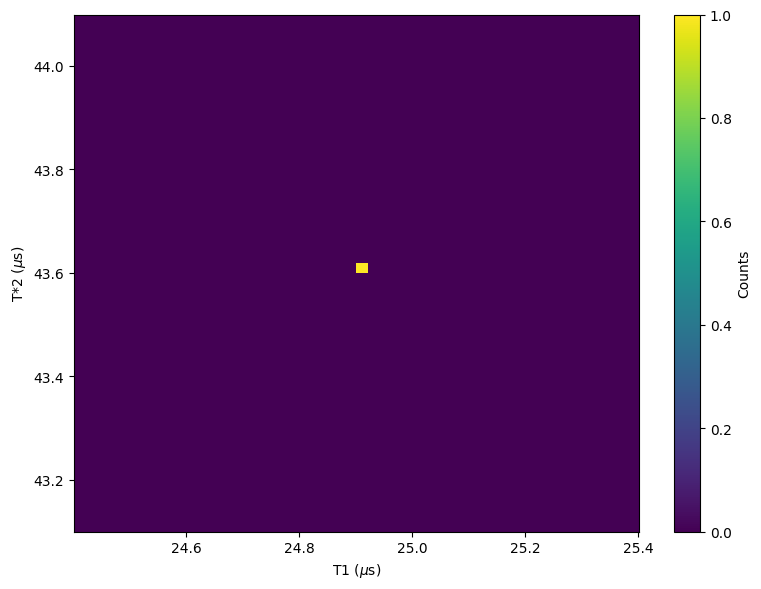

In [2]:
#T1_A_SAMPLE_LO, T2_A_SAMPLE_LO = correlated_2d_normal(mean1, cov1, size=1000)
#T1_A_SAMPLE_HI, T2_A_SAMPLE_HI = correlated_2d_normal(mean2, cov2, size=1000)

#T1_A_SAMPLE_LO, T1_A_SAMPLE_HI = sample_bimodal_gaussian_split(50e-6,10e-6,170e-6,10e-6,500) #b1
#T1_A_SAMPLE_LO, T1_A_SAMPLE_HI = sample_bimodal_gaussian_split(50e-6,10e-6,220e-6,10e-6,10) #b1a
T1_A_SAMPLE_LO, T1_A_SAMPLE_HI = sample_bimodal_gaussian_split(30e-6,5e-6,170e-6,10e-6, 1) #b1b

#T1_A_SAMPLE_LO, T1_A_SAMPLE_HI = sample_bimodal_gaussian_split(120e-6,10e-6,170e-6,10e-6,200) #b2
#T1_A_SAMPLE_LO, T1_A_SAMPLE_HI = sample_bimodal_gaussian_split(120e-6,5e-6,170e-6,10e-6,10) #b2b
#T1_A_SAMPLE_LO, T1_A_SAMPLE_HI = sample_bimodal_gaussian_split(120e-6,5e-6,170e-6,10e-6,50) #b2b

T2_A_SAMPLE_LO = make_t2(T1_A_SAMPLE_LO, 350e-6) # 350 or 220
T2_A_SAMPLE_HI = make_t2(T1_A_SAMPLE_HI, 350e-6)



# Create 2D histogram (heatmap)
plt.figure(figsize=(8, 6))
plt.hist2d(np.concatenate([T1_A_SAMPLE_LO,T1_A_SAMPLE_HI])*1e6, np.concatenate([T2_A_SAMPLE_LO,T2_A_SAMPLE_HI])*1e6, bins=50, cmap='viridis')
#plt.hist2d(T2_A_SAMPLE_HI*1e6, T1_A_SAMPLE_HI*1e6, bins=50, cmap='viridis')
#plt.contour(sample0, sample1, bins=50, cmap='viridis')
plt.xlabel("T1 ($\\mu$s)")
plt.ylabel("T*2 ($\\mu$s)")
plt.colorbar(label='Counts')
plt.tight_layout()
plt.show()


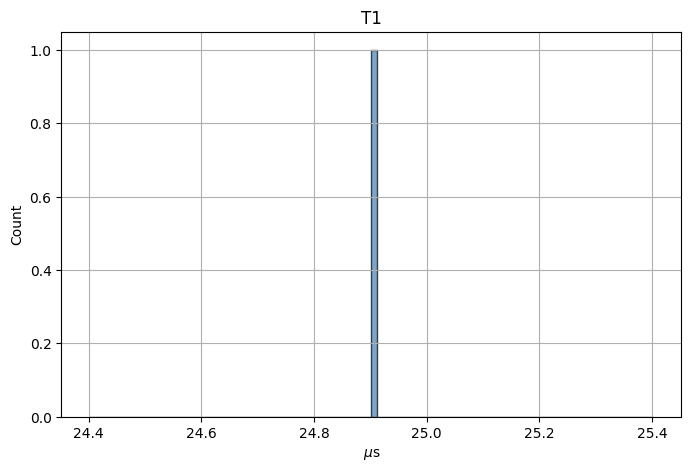

In [3]:
import matplotlib.pyplot as plt

#T1_A_SAMPLE_LO, T1_A_SAMPLE_HI = sample_bimodal_gaussian_split(120e-6,10e-6,170e-6,10e-6,500)

# Drawn from PDF
plt.figure(figsize=(8, 5))
plt.hist(np.concatenate([T1_A_SAMPLE_LO,T1_A_SAMPLE_HI])*1e6, bins=100, alpha=0.7, color='steelblue', edgecolor='black')
#plt.hist(T1_A_SAMPLE_HI*1e6, bins=100, alpha=0.7, color='steelblue', edgecolor='black')

plt.xlabel("$\\mu$s")
plt.ylabel("Count")
plt.title("T1")
plt.grid(True)
plt.show()

## with ZZ coupling

In [20]:
# Two-qubit simultaneous-Ramsey with ZZ coupling + T1/T2
# ---------------------------------------------------------------
import numpy as np, qutip as qt, matplotlib.pyplot as plt
from datetime import datetime

for j in range(2,3):
    print(f"Job: {j}")
    name_hint = ""
    chi_MHz = 0.0
    T1_A_SAMPLE = []
    T2_A_SAMPLE = []

    ver_str = "tp350b1b_100s201p_re_test" # re means realistic freqs 
    

    if j==0: # lo 0mhz
        name_hint="lo_0mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.0
    if j==1: # hi 0mhz
        name_hint="hi_0mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.0
    if j==2: # lo 10mhz
        name_hint="lo_10mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.01
    if j==3: # hi 10mhz
        name_hint="hi_10mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.01
    if j==4: # lo 50mhz
        name_hint="lo_50mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.05
    if j==5: # hi 50mhz
        name_hint="hi_50mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.05
    if j==6: # lo 100mhz
        name_hint="lo_100mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.1
    if j==7: # hi 100mhz
        name_hint="hi_100mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.1    
    if j==8: # lo 300mhz
        name_hint="lo_300mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.3
    if j==9: # hi 300mhz
        name_hint="hi_300mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.3
    if j==10: # lo 30mhz
        name_hint="lo_30mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.03
    if j==11: # hi 30mhz
        name_hint="hi_30mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.03

    expA_list = []
    expB_list = []
    counter = 0 

    for i in range(len(T1_A_SAMPLE)):
        iT1_A = T1_A_SAMPLE[i]
        IT2_A = T2_A_SAMPLE[i]
        if counter%10==0:
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            print(f'loop: {counter} time: {timestamp}')
        counter+=1

        #fA = iQ_A #3.000e9          # qubit bare freqs  (Hz)
        #fA = 3.000e9          # qubit bare freqs  (Hz)
        #fB = 3.040e9        
        fA = 3.440e9          # qubit bare freqs  (Hz) id as "re" type
        fB = 3.330e9
        detA = detB = 3e6         # norm = 3         # Ramsey detuning   (Hz)
        #chi_MHz     = #0.6 #0.6                   # ZZ  (MHz)  (0 → no beating)

        #T1_A = 110e-6 # iQ_A 
        T1_A = iT1_A 
        T1_B = 150e-6 #170e-6         # T1  (s)
        T2_A = IT2_A                  # average?
        T2_B = 180e-6 #190e-6         # desired T2 (s)


        #t_ns = np.linspace(0, 5000, 401)    # free-evolution delays (ns)
        #t_ns = np.linspace(0, 10000, 401)    # free-evolution delays (ns)
        t_ns = np.linspace(0, 100000, 201)    # free-evolution delays (ns)
        #t_ns = np.linspace(0, 10000, 101)
        #t_ns = np.linspace(0, 5000, 201) # best
        #t_ns = np.linspace(0, 40000, 501) #  prod
        #t_ns = np.linspace(0, 100000, 801) # test
        #t_ns = np.linspace(0, 50000, 801) # test

        wA,wB   = 2*np.pi*np.array([fA,fB])
        chi     = 2*np.pi*chi_MHz*1e6
        EdA,EdB = 0.011*wA, 0.011*wB          # 0.01 Rabi → τπ/2≈8 ns
        pi2A,pi2B = np.pi/(2*EdA), np.pi/(2*EdB)
        tau_p   = float(max(pi2A,pi2B))

        I,sx,sz,sm = qt.qeye(2),qt.sigmax(),qt.sigmaz(),qt.destroy(2)
        sxA,sxB = qt.tensor(sx,I), qt.tensor(I,sx)
        szA,szB = qt.tensor(sz,I), qt.tensor(I,sz)
        smA,smB = qt.tensor(sm,I), qt.tensor(I,sm)
        nA,nB   = qt.tensor(qt.num(2),I),   qt.tensor(I,qt.num(2))

        # ─── Collapse operators for given T1 and T2 ─────────────────
        def collapse_ops(T1,T2,sm_op,sz_op):
            g1  = 1/T1
            gphi = max(0, 1/T2 - g1/2)      # 1/T2 = 1/(2T1)+1/Tphi
            return [np.sqrt(g1)*sm_op, np.sqrt(0.5*gphi)*sz_op] # need 0.5?

        c_ops = ( collapse_ops(T1_A,T2_A,smA,szA) +
                  collapse_ops(T1_B,T2_B,smB,szB) )

        # ─── Static Hamiltonian ───────────────────────────
        H0 = 0.5*wA*szA + 0.5*wB*szB + chi/4*szA*szB

        def gate_coeff(ω,amp,t0,t1):
            return lambda t,args=None: amp*np.cos(ω*t) if t0<=t<t1 else 0.0

        def H_sequence(delay_s):
            t1s,t1e = 0.0,        pi2A
            t2s,t2e = tau_p,      tau_p+pi2A
            return [H0,
                    [sxA, gate_coeff(wA+2*np.pi*detA, EdA, t1s, t1e)],
                    [sxB, gate_coeff(wB+2*np.pi*detB, EdB, t1s, pi2B)],
                    [sxA, gate_coeff(wA+2*np.pi*detA, EdA, t2s+delay_s, t2e+delay_s)],
                    [sxB, gate_coeff(wB+2*np.pi*detB, EdB, t2s+delay_s, pi2B+tau_p+delay_s)]], \
                   2*tau_p + delay_s

        # ───  Ramsey point (single integration) ──────────────────────
        #opts = qt.Options(nsteps=20000, store_final_state=True, atol=1e-7, rtol=1e-6)
        opts = {'nsteps':30000, 'store_final_state':True, 'atol':1e-8, 'rtol':1e-7}
        psi_g = qt.tensor(qt.basis(2,0), qt.basis(2,0))

        def ramsey(delay_ns):
            τ = delay_ns*1e-9
            H,t_tot = H_sequence(τ)
            tlist = np.linspace(0,t_tot,int(t_tot/2e-9)+1)  # 2-ns solver step
            st = qt.mesolve(H, psi_g, tlist, c_ops, e_ops=[], options=opts).states[-1]
            return qt.expect(nA,st), qt.expect(nB,st)

        expA,expB = np.array(qt.parallel_map(ramsey,t_ns,progress_bar=False, map_kw={"num_cpus":90})).T
        #expA,expB = np.array([ramsey(t) for t in t_ns]).T

        expA_list.append(expA)
        expB_list.append(expB)    

    # write to file
    # Create a timestamp string
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Create filename
    filename = f"results_t1_{name_hint}_{ver_str}_t1t2XX_{timestamp}_gphi.npz"

    # Save the lists to a compressed npz file
    np.savez(filename, expA_list=expA_list, expB_list=expB_list, T1_A_SAMPLE=T1_A_SAMPLE, T2_A_SAMPLE=T2_A_SAMPLE, t_ns=t_ns)

    print(f"Saved results to {filename}")


Job: 2
loop: 0 time: 20250911_143725


Saved results to results_t1_lo_10mhz_tp350b1b_100s201p_re_test_t1t2XX_20250911_144414_gphi.npz


In [21]:
# Two-qubit + TLS simultaneous-Ramsey with ZZ coupling + T1/T2
# ---------------------------------------------------------------
import numpy as np, qutip as qt, matplotlib.pyplot as plt
from datetime import datetime

for j in range(2,3):
    print(f"Job: {j}")
    name_hint = ""
    chi_MHz = 0.0
    T1_A_SAMPLE = []
    T2_A_SAMPLE = []

    ver_str = "tp350b1b_100s201p_re_tls_slow" # re means realistic freqs 
    

    if j==0: # lo 0mhz
        name_hint="lo_0mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.0
    if j==1: # hi 0mhz
        name_hint="hi_0mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.0
    if j==2: # lo 10mhz
        name_hint="lo_10mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.01
    if j==3: # hi 10mhz
        name_hint="hi_10mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.01
    if j==4: # lo 50mhz
        name_hint="lo_50mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.05
    if j==5: # hi 50mhz
        name_hint="hi_50mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.05
    if j==6: # lo 100mhz
        name_hint="lo_100mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.1
    if j==7: # hi 100mhz
        name_hint="hi_100mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.1    
    if j==8: # lo 300mhz
        name_hint="lo_300mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.3
    if j==9: # hi 300mhz
        name_hint="hi_300mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.3
    if j==10: # lo 30mhz
        name_hint="lo_30mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.03
    if j==11: # hi 30mhz
        name_hint="hi_30mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.03

    expA_list = []
    expB_list = []
    counter = 0 

    for i in range(len(T1_A_SAMPLE)):
        iT1_A = T1_A_SAMPLE[i]
        IT2_A = T2_A_SAMPLE[i]
        if counter%10==0:
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            print(f'loop: {counter} time: {timestamp}')
        counter+=1

        #fA = iQ_A #3.000e9          # qubit bare freqs  (Hz)
        #fA = 3.000e9          # qubit bare freqs  (Hz)
        #fB = 3.040e9        
        fA = 3.440e9          # qubit bare freqs  (Hz) id as "re" type
        fB = 3.330e9
        detA = detB = 3e6         # norm = 3         # Ramsey detuning   (Hz)
        #chi_MHz     = #0.6 #0.6                   # ZZ  (MHz)  (0 → no beating)

        #T1_A = 110e-6 # iQ_A 
        T1_A = iT1_A 
        T1_B = 150e-6 #170e-6         # T1  (s)
        T2_A = IT2_A                  # average?
        T2_B = 180e-6 #190e-6         # desired T2 (s)

        # TLS
        fT   = fA  # fA
        T1_T = 100e6
        T2_T = 150e6
        chi_MHz_T = 0.0

        #t_ns = np.linspace(0, 5000, 401)    # free-evolution delays (ns)
        #t_ns = np.linspace(0, 10000, 401)    # free-evolution delays (ns)
        t_ns = np.linspace(0, 100000, 201)    # free-evolution delays (ns)
        #t_ns = np.linspace(0, 10000, 101)
        #t_ns = np.linspace(0, 5000, 201) # best
        #t_ns = np.linspace(0, 40000, 501) #  prod
        #t_ns = np.linspace(0, 100000, 801) # test
        #t_ns = np.linspace(0, 50000, 801) # test

        wA,wB,wT   = 2*np.pi*np.array([fA,fB,fT])
        chi     = 2*np.pi*chi_MHz*1e6
        chi_T   = 2*np.pi*chi_MHz_T*1e6
        EdA,EdB = 0.011*wA, 0.011*wB          # 0.01 Rabi → τπ/2≈8 ns
        pi2A,pi2B = np.pi/(2*EdA), np.pi/(2*EdB)
        tau_p   = float(max(pi2A,pi2B))

        I,sx,sz,sm = qt.qeye(2),qt.sigmax(),qt.sigmaz(),qt.destroy(2)
        sxA,sxB,sxT = qt.tensor(sx,I,I), qt.tensor(I,sx,I), qt.tensor(I,I,sx)
        szA,szB,szT = qt.tensor(sz,I,I), qt.tensor(I,sz,I), qt.tensor(I,I,sz)
        smA,smB,smT = qt.tensor(sm,I,I), qt.tensor(I,sm,I), qt.tensor(I,I,sm)
        nA,nB,nT   = qt.tensor(qt.num(2),I,I), qt.tensor(I,qt.num(2),I), qt.tensor(I,I,qt.num(2)) 

        # ─── Collapse operators for given T1 and T2 ─────────────────
        def collapse_ops(T1,T2,sm_op,sz_op):
            g1  = 1/T1
            gphi = max(0, 1/T2 - g1/2)      # 1/T2 = 1/(2T1)+1/Tphi
            return [np.sqrt(g1)*sm_op, np.sqrt(0.5*gphi)*sz_op] # need 0.5?

        c_ops = ( collapse_ops(T1_A,T2_A,smA,szA) +
                  collapse_ops(T1_B,T2_B,smB,szB) )

        # ─── Static Hamiltonian ───────────────────────────
        H0 = 0.5*wA*szA + 0.5*wB*szB + chi/4*szA*szB + 0.5*wT*szT + chi_T/4*szA*szT

        def gate_coeff(ω,amp,t0,t1):
            return lambda t,args=None: amp*np.cos(ω*t) if t0<=t<t1 else 0.0

        def H_sequence(delay_s):
            t1s,t1e = 0.0,        pi2A
            t2s,t2e = tau_p,      tau_p+pi2A
            return [H0,
                    [sxA, gate_coeff(wA+2*np.pi*detA, EdA, t1s, t1e)],
                    [sxB, gate_coeff(wB+2*np.pi*detB, EdB, t1s, pi2B)],
                    [sxA, gate_coeff(wA+2*np.pi*detA, EdA, t2s+delay_s, t2e+delay_s)],
                    [sxB, gate_coeff(wB+2*np.pi*detB, EdB, t2s+delay_s, pi2B+tau_p+delay_s)]], \
                   2*tau_p + delay_s

        # ───  Ramsey point (single integration) ──────────────────────
        #opts = qt.Options(nsteps=20000, store_final_state=True, atol=1e-7, rtol=1e-6)
        opts = {'nsteps':30000, 'store_final_state':True, 'atol':1e-8, 'rtol':1e-7}
        psi_g = qt.tensor(qt.basis(2,0), qt.basis(2,0), qt.basis(2,0))

        def ramsey(delay_ns):
            τ = delay_ns*1e-9
            H,t_tot = H_sequence(τ)
            tlist = np.linspace(0,t_tot,int(t_tot/2e-9)+1)  # 2-ns solver step
            st = qt.mesolve(H, psi_g, tlist, c_ops, e_ops=[], options=opts).states[-1]
            return qt.expect(nA,st), qt.expect(nB,st)

        expA,expB = np.array(qt.parallel_map(ramsey,t_ns,progress_bar=False, map_kw={"num_cpus":90})).T
        #expA,expB = np.array([ramsey(t) for t in t_ns]).T

        expA_list.append(expA)
        expB_list.append(expB)    

    # write to file
    # Create a timestamp string
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Create filename
    filename = f"results_t1_{name_hint}_{ver_str}_t1t2XX_{timestamp}_gphi.npz"

    # Save the lists to a compressed npz file
    np.savez(filename, expA_list=expA_list, expB_list=expB_list, T1_A_SAMPLE=T1_A_SAMPLE, T2_A_SAMPLE=T2_A_SAMPLE, t_ns=t_ns)

    print(f"Saved results to {filename}")


Job: 2
loop: 0 time: 20250911_144414


Saved results to results_t1_lo_10mhz_tp350b1b_100s201p_re_tls_slow_t1t2XX_20250911_145259_gphi.npz


# --STOP--

In [14]:
# Test cython Two-qubit + TLS simultaneous-Ramsey with ZZ coupling + T1/T2
# ---------------------------------------------------------------
import numpy as np, qutip as qt, matplotlib.pyplot as plt
from datetime import datetime

for j in range(2,3):
    print(f"Job: {j}")
    name_hint = ""
    chi_MHz = 0.0
    T1_A_SAMPLE = []
    T2_A_SAMPLE = []

    ver_str = "tp350b1b_100s201p_re_tls_cy" # re means realistic freqs 
    

    if j==0: # lo 0mhz
        name_hint="lo_0mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.0
    if j==1: # hi 0mhz
        name_hint="hi_0mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.0
    if j==2: # lo 10mhz
        name_hint="lo_10mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.01
    if j==3: # hi 10mhz
        name_hint="hi_10mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.01
    if j==4: # lo 50mhz
        name_hint="lo_50mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.05
    if j==5: # hi 50mhz
        name_hint="hi_50mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.05
    if j==6: # lo 100mhz
        name_hint="lo_100mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.1
    if j==7: # hi 100mhz
        name_hint="hi_100mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.1    
    if j==8: # lo 300mhz
        name_hint="lo_300mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.3
    if j==9: # hi 300mhz
        name_hint="hi_300mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.3
    if j==10: # lo 30mhz
        name_hint="lo_30mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.03
    if j==11: # hi 30mhz
        name_hint="hi_30mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.03

    expA_list = []
    expB_list = []
    counter = 0 

    for i in range(len(T1_A_SAMPLE)):
        iT1_A = T1_A_SAMPLE[i]
        IT2_A = T2_A_SAMPLE[i]
        if counter%10==0:
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            print(f'loop: {counter} time: {timestamp}')
        counter+=1

        #fA = iQ_A #3.000e9          # qubit bare freqs  (Hz)
        #fA = 3.000e9          # qubit bare freqs  (Hz)
        #fB = 3.040e9        
        fA = 3.440e9          # qubit bare freqs  (Hz) id as "re" type
        fB = 3.330e9
        detA = detB = 3e6         # norm = 3         # Ramsey detuning   (Hz)
        #chi_MHz     = #0.6 #0.6                   # ZZ  (MHz)  (0 → no beating)

        #T1_A = 110e-6 # iQ_A 
        T1_A = iT1_A 
        T1_B = 150e-6 #170e-6         # T1  (s)
        T2_A = IT2_A                  # average?
        T2_B = 180e-6 #190e-6         # desired T2 (s)

        # TLS
        fT   = fA #3.00e9  # fA
        T1_T = 100e6
        T2_T = 150e6
        chi_MHz_T = 0.00

        #t_ns = np.linspace(0, 5000, 401)    # free-evolution delays (ns)
        #t_ns = np.linspace(0, 10000, 401)    # free-evolution delays (ns)
        t_ns = np.linspace(0, 100000, 201)    # free-evolution delays (ns)
        #t_ns = np.linspace(0, 10000, 101)
        #t_ns = np.linspace(0, 5000, 201) # best
        #t_ns = np.linspace(0, 40000, 501) #  prod
        #t_ns = np.linspace(0, 100000, 801) # test
        #t_ns = np.linspace(0, 50000, 801) # test

        wA,wB,wT   = 2*np.pi*np.array([fA,fB,fT])
        chi     = 2*np.pi*chi_MHz*1e6
        chi_T   = 2*np.pi*chi_MHz_T*1e6
        EdA,EdB = 0.011*wA, 0.011*wB          # 0.01 Rabi → τπ/2≈8 ns
        pi2A,pi2B = np.pi/(2*EdA), np.pi/(2*EdB)
        tau_p   = float(max(pi2A,pi2B))

        I,sx,sz,sm = qt.qeye(2),qt.sigmax(),qt.sigmaz(),qt.destroy(2)
        sxA,sxB,sxT = qt.tensor(sx,I,I), qt.tensor(I,sx,I), qt.tensor(I,I,sx)
        szA,szB,szT = qt.tensor(sz,I,I), qt.tensor(I,sz,I), qt.tensor(I,I,sz)
        smA,smB,smT = qt.tensor(sm,I,I), qt.tensor(I,sm,I), qt.tensor(I,I,sm)
        nA,nB,nT   = qt.tensor(qt.num(2),I,I), qt.tensor(I,qt.num(2),I), qt.tensor(I,I,qt.num(2)) 

        # ─── Collapse operators for given T1 and T2 ─────────────────
        def collapse_ops(T1,T2,sm_op,sz_op):
            g1  = 1/T1
            gphi = max(0, 1/T2 - g1/2)      # 1/T2 = 1/(2T1)+1/Tphi
            return [np.sqrt(g1)*sm_op, np.sqrt(0.5*gphi)*sz_op] # need 0.5?

        c_ops = ( collapse_ops(T1_A,T2_A,smA,szA) +
                  collapse_ops(T1_B,T2_B,smB,szB) + 
                  collapse_ops(T1_T,T2_T,smT,szT))

        # ─── Static Hamiltonian ───────────────────────────
        #H0 = 0.5*wA*szA + 0.5*wB*szB + chi/4*szA*szB + 0.5*wT*szT + chi_T/4*szA*szT
        H0 = 0.5*wA*szA + 0.5*wB*szB + chi/4*szA*szB + 0.5*wT*szT + chi_T/4*szA*szT

        def gate_coeff(ω,amp,t0,t1):
            return lambda t,args=None: amp*np.cos(ω*t) if t0<=t<t1 else 0.0

        def H_sequence(delay_s):
            t1s,t1e = 0.0,        pi2A
            t2s,t2e = tau_p,      tau_p+pi2A
            wA_detA = wA+2*np.pi*detA
            wB_detB = wB+2*np.pi*detB
            H = [H0,
                [sxA, f"cos({wA_detA} * t) * (t >= {t1s}) * (t < {t1e}) + cos({wA_detA} * t) * (t >= {t2s} + delay_s) * (t < {t2e} + delay_s)"],
                [sxB, F"cos({wB_detB} * t) * (t >= {t1s}) * (t < {pi2B}) + cos({wB_detB} * t) * (t >= {t2s} + delay_s) * (t < {pi2B + tau_p} + delay_s)"]
                ]
            H[1][1] = f"{EdA}*({H[1][1]})"
            H[2][1] = f"{EdB}*({H[2][1]})"
            
            return H, \
                   2*tau_p + delay_s

        # ───  Ramsey point (single integration) ──────────────────────
        #opts = qt.Options(nsteps=20000, store_final_state=True, atol=1e-7, rtol=1e-6)
        opts = {'nsteps':30000, 'store_final_state':True, 'atol':1e-8, 'rtol':1e-7}
        psi_g = qt.tensor(qt.basis(2,0), qt.basis(2,0), qt.basis(2,0))

        def ramsey(delay_ns):
            tau = delay_ns*1e-9
            H,t_tot = H_sequence(tau)
            tlist = np.linspace(0,t_tot,int(t_tot/2e-9)+1)  # 2-ns solver step
            args = {"delay_s":tau}
            st = qt.mesolve(H, psi_g, tlist, c_ops, e_ops=[], options=opts, args=args).states[-1]
            return qt.expect(nA,st), qt.expect(nB,st)

        expA,expB = np.array(qt.parallel_map(ramsey,t_ns,progress_bar=False, map_kw={"num_cpus":90})).T
        #expA,expB = np.array([ramsey(t) for t in t_ns]).T

        expA_list.append(expA)
        expB_list.append(expB)    

    # write to file
    # Create a timestamp string
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Create filename
    filename = f"results_t1_{name_hint}_{ver_str}_t1t2XX_{timestamp}_gphi.npz"

    # Save the lists to a compressed npz file
    np.savez(filename, expA_list=expA_list, expB_list=expB_list, T1_A_SAMPLE=T1_A_SAMPLE, T2_A_SAMPLE=T2_A_SAMPLE, t_ns=t_ns)

    print(f"Saved results to {filename}")


Job: 2
loop: 0 time: 20250912_102642


Saved results to results_t1_lo_10mhz_tp350b1b_100s201p_re_tls_cy_t1t2XX_20250912_103337_gphi.npz


Job: 2
loop: 0 time: 20250912_103639


201


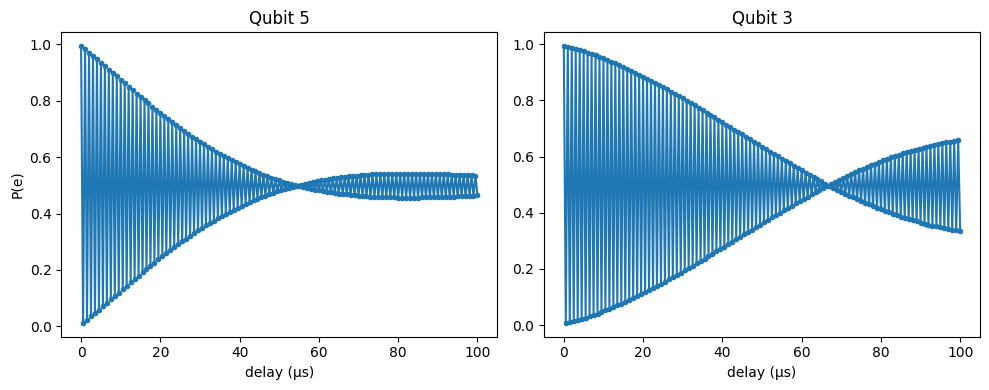

201


In [15]:
# Test cython Two-qubit + TLS simultaneous-Ramsey with ZZ coupling + T1/T2
# ---------------------------------------------------------------
import numpy as np, qutip as qt, matplotlib.pyplot as plt
from datetime import datetime

for j in range(2,3):
    print(f"Job: {j}")
    name_hint = ""
    chi_MHz = 0.0
    T1_A_SAMPLE = []
    T2_A_SAMPLE = []

    ver_str = "tp350b1b_100s201p_re_tls_cy_split" # re means realistic freqs 
    

    if j==0: # lo 0mhz
        name_hint="lo_0mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.0
    if j==1: # hi 0mhz
        name_hint="hi_0mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.0
    if j==2: # lo 10mhz
        name_hint="lo_10mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.01
    if j==3: # hi 10mhz
        name_hint="hi_10mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.01
    if j==4: # lo 50mhz
        name_hint="lo_50mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.05
    if j==5: # hi 50mhz
        name_hint="hi_50mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.05
    if j==6: # lo 100mhz
        name_hint="lo_100mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.1
    if j==7: # hi 100mhz
        name_hint="hi_100mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.1    
    if j==8: # lo 300mhz
        name_hint="lo_300mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.3
    if j==9: # hi 300mhz
        name_hint="hi_300mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.3
    if j==10: # lo 30mhz
        name_hint="lo_30mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.03
    if j==11: # hi 30mhz
        name_hint="hi_30mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.03

    expA_list = []
    expB_list = []
    counter = 0 

    for i in range(len(T1_A_SAMPLE)):
        iT1_A = T1_A_SAMPLE[i]
        IT2_A = T2_A_SAMPLE[i]
        if counter%10==0:
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            print(f'loop: {counter} time: {timestamp}')
        counter+=1

        #fA = iQ_A #3.000e9          # qubit bare freqs  (Hz)
        #fA = 3.000e9          # qubit bare freqs  (Hz)
        #fB = 3.040e9        
        fA = 3.440e9          # qubit bare freqs  (Hz) id as "re" type
        fB = 3.330e9
        detA = detB = 3e6         # norm = 3         # Ramsey detuning   (Hz)
        #chi_MHz     = #0.6 #0.6                   # ZZ  (MHz)  (0 → no beating)

        #T1_A = 110e-6 # iQ_A 
        T1_A = iT1_A 
        T1_B = 150e-6 #170e-6         # T1  (s)
        T2_A = IT2_A                  # average?
        T2_B = 180e-6 #190e-6         # desired T2 (s)

        # TLS
        fT   = fA #3.00e9  # fA
        T1_T = 100e6
        T2_T = 150e6
        chi_MHz_T = 0.00

        #t_ns = np.linspace(0, 5000, 401)    # free-evolution delays (ns)
        #t_ns = np.linspace(0, 10000, 401)    # free-evolution delays (ns)
        t_ns = np.linspace(0, 100000, 201)    # free-evolution delays (ns)
        #t_ns = np.linspace(0, 10000, 101)
        #t_ns = np.linspace(0, 5000, 201) # best
        #t_ns = np.linspace(0, 40000, 501) #  prod
        #t_ns = np.linspace(0, 100000, 801) # test
        #t_ns = np.linspace(0, 50000, 801) # test

        wA,wB,wT   = 2*np.pi*np.array([fA,fB,fT])
        chi     = 2*np.pi*chi_MHz*1e6
        chi_T   = 2*np.pi*chi_MHz_T*1e6
        EdA,EdB = 0.011*wA, 0.0113*wB          # 0.01 Rabi → τπ/2≈8 ns
        pi2A,pi2B = np.pi/(2*EdA), np.pi/(2*EdB)
        tau_p   = float(max(pi2A,pi2B))

        I,sx,sz,sm = qt.qeye(2),qt.sigmax(),qt.sigmaz(),qt.destroy(2)
        sxA,sxB,sxT = qt.tensor(sx,I,I), qt.tensor(I,sx,I), qt.tensor(I,I,sx)
        szA,szB,szT = qt.tensor(sz,I,I), qt.tensor(I,sz,I), qt.tensor(I,I,sz)
        smA,smB,smT = qt.tensor(sm,I,I), qt.tensor(I,sm,I), qt.tensor(I,I,sm)
        nA,nB,nT   = qt.tensor(qt.num(2),I,I), qt.tensor(I,qt.num(2),I), qt.tensor(I,I,qt.num(2)) 

        # ─── Collapse operators for given T1 and T2 ─────────────────
        def collapse_ops(T1,T2,sm_op,sz_op):
            g1  = 1/T1
            gphi = max(0, 1/T2 - g1/2)      # 1/T2 = 1/(2T1)+1/Tphi
            return [np.sqrt(g1)*sm_op, np.sqrt(0.5*gphi)*sz_op] # need 0.5?

        c_ops = ( collapse_ops(T1_A,T2_A,smA,szA) +
                  collapse_ops(T1_B,T2_B,smB,szB) + 
                  collapse_ops(T1_T,T2_T,smT,szT))

        # ─── Static Hamiltonian ───────────────────────────
        #H0 = 0.5*wA*szA + 0.5*wB*szB + chi/4*szA*szB + 0.5*wT*szT + chi_T/4*szA*szT
        H0 = 0.5*wA*szA + 0.5*wB*szB + chi/4*szA*szB + 0.5*wT*szT + chi_T/4*szA*szT

        def gate_coeff(ω,amp,t0,t1):
            return lambda t,args=None: amp*np.cos(ω*t) if t0<=t<t1 else 0.0

        def H_sequence(delay_s):
            t1s,t1e = 0.0,        pi2A
            t2s,t2e = tau_p,      tau_p+pi2A
            wA_detA = wA+2*np.pi*detA
            wB_detB = wB+2*np.pi*detB
            H = [H0,
                [sxA, f"cos({wA_detA} * t) * (t >= {t1s}) * (t < {t1e}) + cos({wA_detA} * t) * (t >= {t2s} + delay_s) * (t < {t2e} + delay_s)"],
                [sxB, F"cos({wB_detB} * t) * (t >= {t1s}) * (t < {pi2B}) + cos({wB_detB} * t) * (t >= {t2s} + delay_s) * (t < {pi2B + tau_p} + delay_s)"]
                ]
            H[1][1] = f"{EdA}*({H[1][1]})"
            H[2][1] = f"{EdB}*({H[2][1]})"
            
            return H, \
                   2*tau_p + delay_s

        # ───  Ramsey point (single integration) ──────────────────────
        #opts = qt.Options(nsteps=20000, store_final_state=True, atol=1e-7, rtol=1e-6)
        opts = {'nsteps':30000, 'store_final_state':True, 'atol':1e-8, 'rtol':1e-7}
        psi_g = qt.tensor(qt.basis(2,0), qt.basis(2,0), qt.basis(2,1))

        def ramsey(delay_ns):
            tau = delay_ns*1e-9
            #H,t_tot = H_sequence(tau)
            
            # h sequence
            t_tot = 2*tau_p + tau

            t1s,t1e = 0.0,        pi2A
            t2s,t2e = tau_p,      tau_p+pi2A
            wA_detA = wA+2*np.pi*detA
            wB_detB = wB+2*np.pi*detB

            # pi/2 
            H = [H0,
                [sxA, f"{EdA}*cos({wA_detA} * t)"],
                [sxB, F"{EdB}*cos({wB_detB} * t)"]
                ]

            #tlist = np.arange(0,t1e,2e-9)  # 2-ns solver step
            tlist = np.linspace(0,t1e,int(t1e/2e-9)+1)  # 2-ns solver step

            #print(tlist)
            st = qt.mesolve(H, psi_g, tlist, c_ops, e_ops=[], options=opts).states[-1]
 
            t0 = tlist[-1]
            # tlist = np.arange(t0+t1e,t0+tau,2e-9)  # 2-ns solver step
            tlist = np.linspace(t0,t0+tau,int(tau/2e-9)+1)  # 2-ns solver step
            if len(tlist) > 1 :
                 st = qt.mesolve(H0, st, tlist, c_ops, e_ops=[], options=opts).states[-1]            

            t0 = tlist[-1]
            #tlist = np.arange(t0+tau,t0+t2e+tau, 2e-9)  # 2-ns solver step
            tlist = np.linspace(t0,t0+t1e,int(t1e/2e-9)+1)  # 2-ns solver step
            st = qt.mesolve(H, st, tlist, c_ops, e_ops=[], options=opts).states[-1]

            return qt.expect(nA,st), qt.expect(nB,st)

        expA,expB = np.array(qt.parallel_map(ramsey,t_ns,progress_bar=False, map_kw={"num_cpus":90})).T
        #expA,expB = np.array([ramsey(t) for t in t_ns]).T

        expA_list.append(expA)
        expB_list.append(expB)    

    # write to file
    # Create a timestamp string
    #timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Create filename
    #filename = f"results_t1_{name_hint}_{ver_str}_t1t2XX_{timestamp}_gphi.npz"

    # Save the lists to a compressed npz file
    #np.savez(filename, expA_list=expA_list, expB_list=expB_list, T1_A_SAMPLE=T1_A_SAMPLE, T2_A_SAMPLE=T2_A_SAMPLE, t_ns=t_ns)

    #print(f"Saved results to {filename}")


expA = expA_list[0]
expB = expB_list[0]

t_ns = np.linspace(0, 100000, len(expA))
print(len(expA))

# ───  Plot ───────────────────────────────────────────────────
plt.figure(figsize=(10,4))
plt.subplot(121); plt.plot(t_ns/1000,expA,'.-'); plt.title('Qubit 5'); plt.xlabel('delay (µs)'); plt.ylabel('P(e)')
plt.subplot(122); plt.plot(t_ns/1000,expB,'.-'); plt.title('Qubit 3'); plt.xlabel('delay (µs)')
plt.tight_layout(); plt.show()
print(len(expA))


In [47]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

def ramsey_twoqubit_string(
    fA: float = 3.0e9,
    fB: float = 3.04e9,
    T1_A: float = 100e-6,
    T2_A: float = 120e-6,
    T1_B: float = 120e-6,
    T2_B: float = 150e-6,
    chi_MHz: float = 0.0,
    detA: float = 3e6,
    detB: float = 3e6,
    n_points: int = 201,
    t_max_ns: float = 100000,
    rabi_scale: float = 0.011,
    num_cpus: int = 4
):
    """
    Simulate a two-qubit Ramsey experiment with ZZ coupling using QuTiP,
    using the string format method for time-dependent Hamiltonians.
    """
    # Time axis
    t_ns = np.linspace(0, t_max_ns, n_points)
    t_s = t_ns * 1e-9

    # Frequencies and coupling
    wA, wB = 2 * np.pi * np.array([fA, fB])
    chi = 2 * np.pi * chi_MHz * 1e6

    # Operators
    I, sx, sz, sm = qt.qeye(2), qt.sigmax(), qt.sigmaz(), qt.destroy(2)
    sxA, sxB = qt.tensor(sx, I), qt.tensor(I, sx)
    szA, szB = qt.tensor(sz, I), qt.tensor(I, sz)
    smA, smB = qt.tensor(sm, I), qt.tensor(I, sm)
    nA, nB = qt.tensor(qt.num(2), I), qt.tensor(I, qt.num(2))

    # Collapse operators
    def collapse_ops(T1, T2, sm_op, sz_op):
        g1 = 1 / T1
        gphi = max(0, 1 / T2 - g1 / 2)
        return [np.sqrt(g1) * sm_op, np.sqrt(0.5 * gphi) * sz_op]

    c_ops = collapse_ops(T1_A, T2_A, smA, szA) + collapse_ops(T1_B, T2_B, smB, szB)

    # Rabi drive
    EdA, EdB = rabi_scale * wA, rabi_scale * wB
    pi2A, pi2B = np.pi / (2 * EdA), np.pi / (2 * EdB)
    tau_p = float(max(pi2A, pi2B))

    psi_g = qt.tensor(qt.basis(2, 0), qt.basis(2, 0))

    def run_ramsey(delay_ns):
        tau = delay_ns * 1e-9

        # Pulse sequence times
        t1s, t1e = 0.0, pi2A
        t2s, t2e = tau_p, tau_p + pi2A
        t_tot = 2 * tau_p + tau

        # Hamiltonian (static part)
        H0 = 0.5 * wA * szA + 0.5 * wB * szB + chi / 4 * szA * szB

        # Time-dependent drives using string format
        H = [
            H0,
            [sxA, "cos(wA_detA * t) * (t >= t1s) * (t < t1e) + cos(wA_detA * t) * (t >= t2s + delay) * (t < t2e + delay)"],
            [sxB, "cos(wB_detB * t) * (t >= t1s) * (t < pi2B) + cos(wB_detB * t) * (t >= t2s + delay) * (t < pi2B + tau_p + delay)"]
        ]

        args = dict(
            wA_detA=wA + 2 * np.pi * detA,
            wB_detB=wB + 2 * np.pi * detB,
            t1s=t1s,
            t1e=t1e,
            t2s=t2s,
            t2e=t2e,
            pi2B=pi2B,
            tau_p=tau_p,
            delay=tau,
            EdA=EdA,
            EdB=EdB
        )

        # Scale amplitudes in the Hamiltonian
        H[1][1] = f"EdA*({H[1][1]})"
        H[2][1] = f"EdB*({H[2][1]})"

        # Time list
        tlist = np.linspace(0, t_tot, int(t_tot / 2e-9) + 1)

        result = qt.mesolve(H, psi_g, tlist, c_ops, e_ops=[], args=args,
                            options={'nsteps': 20000, 'store_final_state': True, 'atol': 1e-7, 'rtol': 1e-6})
        st = result.states[-1]
        return qt.expect(nA, st), qt.expect(nB, st)

    expA, expB = np.array(qt.parallel_map(run_ramsey, t_ns, progress_bar=True, map_kw={"num_cpus": num_cpus})).T

    return t_ns, expA, expB

if __name__ == "__main__":
    t_ns, expA, expB = ramsey_twoqubit_string()
    plt.figure(figsize=(10, 4))
    plt.plot(t_ns * 1e-3, expA, label="Qubit A")
    plt.plot(t_ns * 1e-3, expB, label="Qubit B")
    plt.xlabel("Ramsey delay (µs)")
    plt.ylabel("P(e)")
    plt.title("Two-Qubit Ramsey Experiment (QuTiP, String Format)")
    plt.legend()
    plt.tight_layout()

Total run time:   0.03s


AttributeError: Can't pickle local object 'ramsey_twoqubit_string.<locals>.run_ramsey'

In [39]:
pi_vec=np.arange(0,10+1,2)
tlist = np.linspace(0,17e-9,int(17e-9/1e-9/2)+1)
print(tlist)

[0.0000e+00 2.1250e-09 4.2500e-09 6.3750e-09 8.5000e-09 1.0625e-08
 1.2750e-08 1.4875e-08 1.7000e-08]
